In [1]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [2]:
wine_data = load_wine()
df_data=pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df_target=pd.DataFrame(wine_data.target, columns=["kind"])
totall_data=pd.concat([df_data,df_target], axis=1)

In [3]:
totall_data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'kind'],
      dtype='object')

In [4]:
df_data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [5]:
df_data.dropna() #결측값 있는 행 제거
df_data.dropna(axis=1) #결측값 있는 열 제거

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


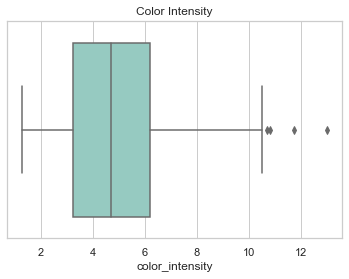

In [6]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="color_intensity",data=totall_data, palette="Set3")
plt.title("Color Intensity")
plt.show()

In [7]:
Q1 = totall_data[['color_intensity']].quantile(q=0.25)
Q3 = totall_data[['color_intensity']].quantile(q=0.75)
print(Q1)
print(Q3)

color_intensity    3.22
Name: 0.25, dtype: float64
color_intensity    6.2
Name: 0.75, dtype: float64


In [8]:
IQR = Q3-Q1
IQR

color_intensity    2.98
dtype: float64

<AxesSubplot:xlabel='kind', ylabel='count'>

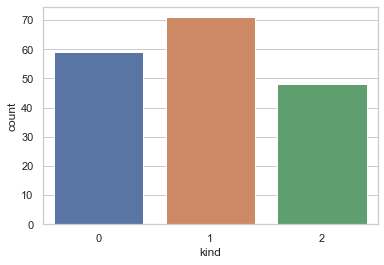

In [9]:
sns.countplot(data=totall_data, x="kind")

In [10]:
totall_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,kind
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


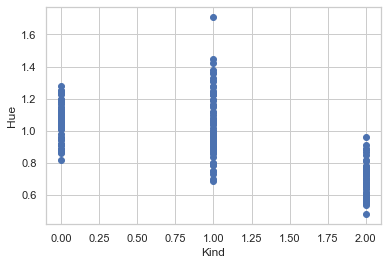

In [11]:
plt.scatter(totall_data['kind'], totall_data['hue'])
plt.xlabel('Kind')
plt.ylabel('Hue')

plt.show()

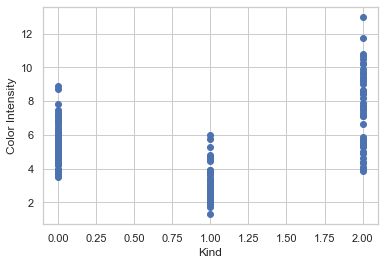

In [12]:
plt.scatter(totall_data['kind'], totall_data['color_intensity'])
plt.xlabel('Kind')
plt.ylabel('Color Intensity')

plt.show()

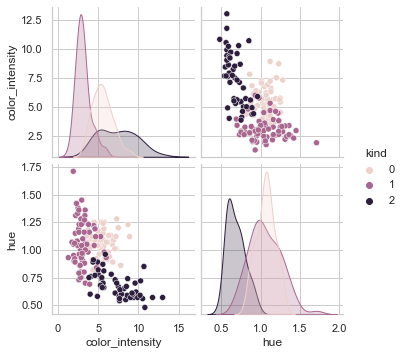

In [13]:
sns.pairplot(totall_data,
             vars=['color_intensity', 'hue'],
            hue ='kind')
plt.show()

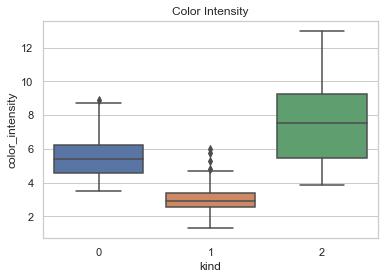

In [14]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="kind", y="color_intensity", data=totall_data)
plt.title("Color Intensity")
plt.show()

Text(0.5, 1.0, 'Alcohol')

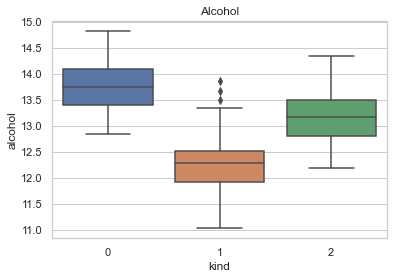

In [15]:
sns.boxplot(x="kind", y="alcohol", data=totall_data)
plt.title("Alcohol")

Text(0.5, 1.0, 'Label')

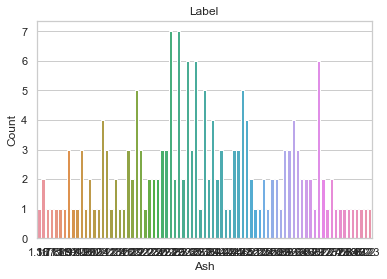

In [16]:
sns.countplot(data=totall_data, x="ash")
plt.xlabel("Ash")
plt.ylabel("Count")
plt.title("Label")

In [17]:
X=totall_data.drop('kind',axis=1)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [18]:
y=totall_data['kind']
y.value_counts()

1    71
0    59
2    48
Name: kind, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [20]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0
135,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695.0
74,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0
16,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0
117,12.42,1.61,2.19,22.5,108.0,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345.0
47,13.90,1.68,2.12,16.0,101.0,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985.0


In [21]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.8222222222222222
[[15  0  1]
 [ 0 17  4]
 [ 0  3  5]]


In [22]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9333333333333333
[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.9555555555555556
[[15  1  0]
 [ 0 20  1]
 [ 0  0  8]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9333333333333333
[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9777777777777777
[[16  0  0]
 [ 0 20  1]
 [ 0  0  8]]


In [27]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train.values.ravel())
a=model.score(X_test, y_test)

In [31]:
for n in range(3, 133):
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train, y_train.values.ravel())
    score = model.score(X_test, y_test)
    if score > a:
        print(n)
        a = score
        max = n
model.n_neighbors = max
model.fit(X_train, y_train.values.ravel())
max_S = model.score(X_test, y_test)
print("정확도가 가장 높은 최근접 이웃 개수는 정확도가 %.9f%%인 %d 입니다."%(max_S*100, max))

정확도가 가장 높은 최근접 이웃 개수는 정확도가 82.222222222%인 76 입니다.
